# OpenVaccine: COVID-19 mRNA Vaccine Degradation Prediction Getting Started Notebook

A starter notebook for those planning to build your submission from scratch. Will update with EDA as and when time permits.

This notebook presents how to find correlation between features and grade features by importance for training.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import json
from pandas.io.json import json_normalize

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Read train and test json

In [4]:
token2int = {x:i for i, x in enumerate('().ACGUBEHIMSX')}

In [5]:
train_full = pd.read_json('../../train.json', lines=True)
train_full.shape

(2400, 19)

In [6]:
train_full.head().T

,0,1,2,3,4
SN_filter,1,0,1,0,0
deg_50C,"[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.9501000000000001, 1.7974999999999999, 1.499...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."
deg_Mg_50C,"[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0..."
deg_Mg_pH10,"[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0...."
deg_error_50C,"[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150..."
deg_error_Mg_50C,"[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[121286.7181, 121286.7182, 121286.7181, 121286...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1..."
deg_error_Mg_pH10,"[0.26130000000000003, 0.38420000000000004, 0.1...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1..."
deg_error_pH10,"[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000..."
deg_pH10,"[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7..."
id,id_001f94081,id_0049f53ba,id_006f36f57,id_0082d463b,id_0087940f4


Not so intuitive, right. Lets see if we can flatten it.

In [7]:
train_json = [json.loads(line) for line in open('../../train.json', 'r')]

In [8]:
def preprocess_json(input_json):
    
    for index,json_ in enumerate(input_json):
        length = json_['seq_scored']
        json_['step'] = list(range(length))
            
        json_['sequence'] = pd.Series([json_['sequence']]).map(lambda seq: [token2int[x] for x in seq]).values.tolist()[0][:length]
        json_['structure'] = pd.Series([json_['structure']]).map(lambda seq: [token2int[x] for x in seq]).values.tolist()[0][:length]
        json_['predicted_loop_type'] = pd.Series([json_['predicted_loop_type']]).map(lambda seq: [token2int[x] for x in seq]).values.tolist()[0][:length]
        if os.path.exists('../../bpps/'+json_['id']+'.npy'):
            json_['unpaired_probability'] = list(1-sum(np.load('../../bpps/'+json_['id']+'.npy')))[:length]
        else:
            print('bpps not found')

preprocess_json(train_json)

In [14]:
def process_json(input_json):
    train = pd.io.json.json_normalize(data = input_json, 
                                record_path ='step',  
                                meta =['id','seq_length','seq_scored']) 
    train.rename(columns={0:'step'}, inplace=True)
    train['unpaired_probability'] = pd.io.json.json_normalize(data = input_json, 
                                record_path ='unpaired_probability'
                                            )
    train['sequence'] = pd.io.json.json_normalize(data = input_json, 
                                record_path ='sequence'
                                            )
    train['structure'] = pd.io.json.json_normalize(data = input_json, 
                                record_path ='structure'
                                            )
    train['predicted_loop_type'] = pd.io.json.json_normalize(data = input_json, 
                                record_path ='predicted_loop_type'
                                            )
    train['reactivity'] = pd.io.json.json_normalize(data = input_json, 
                                    record_path ='reactivity'
                                                )
    train['reactivity_error'] = pd.io.json.json_normalize(data = input_json, 
                                    record_path ='reactivity_error'
                                                )
    train['deg_Mg_pH10'] = pd.io.json.json_normalize(data = input_json, 
                                    record_path ='deg_Mg_pH10'
                                                )
    train['deg_error_Mg_pH10'] = pd.io.json.json_normalize(data = input_json, 
                                    record_path ='deg_error_Mg_pH10'
                                                )
    train['deg_pH10'] = pd.io.json.json_normalize(data = input_json, 
                                    record_path ='deg_pH10',
                                                )
    train['deg_error_pH10'] = pd.io.json.json_normalize(data = input_json, 
                                    record_path ='deg_error_pH10',
                                                )
    train['deg_Mg_50C'] = pd.io.json.json_normalize(data = input_json, 
                                    record_path ='deg_Mg_50C',
                                                )
    train['deg_error_Mg_50C'] = pd.io.json.json_normalize(data = input_json, 
                                    record_path ='deg_error_Mg_50C',
                                                )
    train['deg_50C'] = pd.io.json.json_normalize(data = input_json, 
                                    record_path ='deg_50C',
                                                )
    train['deg_error_50C'] = pd.io.json.json_normalize(data = input_json, 
                                    record_path ='deg_error_50C',
                                                )
        
    train.set_index(['id','step'], inplace=True)
    return train

X_train = process_json(train_json)

In [15]:
def post_process_json(input_df):
    input_df = pd.concat([input_df.drop('sequence', axis=1), pd.get_dummies(input_df['sequence'], prefix='Base')], axis=1)
    input_df = pd.concat([input_df.drop('structure', axis=1), pd.get_dummies(input_df['structure'], prefix='Structure')], axis=1)
    input_df = pd.concat([input_df.drop('predicted_loop_type', axis=1), pd.get_dummies(input_df['predicted_loop_type'], prefix='Loop')], axis=1)
    return input_df

X_train_full = post_process_json(X_train)

In [16]:
label_cols = ['reactivity','deg_Mg_pH10','deg_pH10','deg_Mg_50C','deg_50C']
y_train = X_train_full[label_cols]

In [17]:
input_cols = ['Base_3','Base_4','Base_5','Base_6','Structure_0','Structure_1','Structure_2','Loop_7','Loop_8','Loop_9','Loop_10','Loop_11','Loop_12','Loop_13']
X_train = X_train_full[input_cols]

## Find the correlation between Features and Display on a heatmap

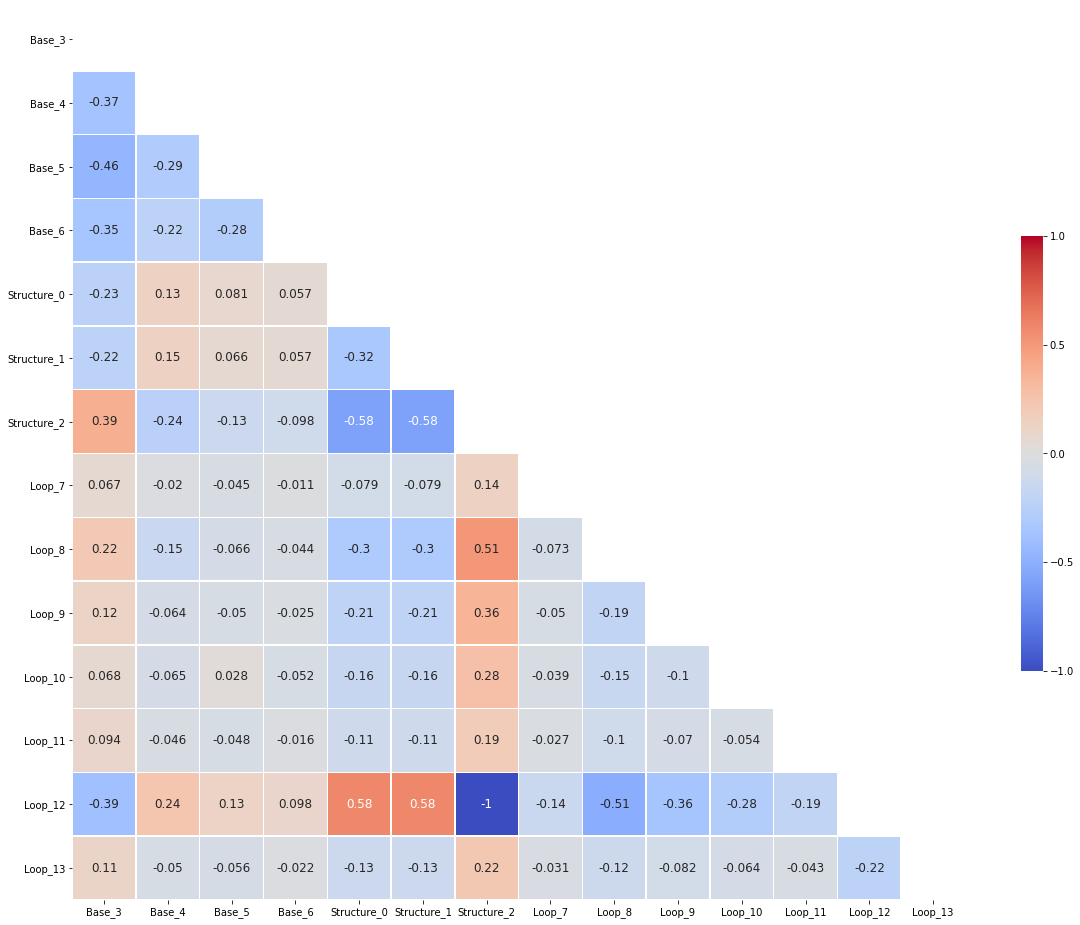

In [18]:
corr_matrix = X_train.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [19]:
print(token2int)

{'(': 0, ')': 1, '.': 2, 'A': 3, 'C': 4, 'G': 5, 'U': 6, 'B': 7, 'E': 8, 'H': 9, 'I': 10, 'M': 11, 'S': 12, 'X': 13}


It can be seen that loop 12 ('S' type - paired stem) has good correlation with Structure.  Especially Structure 2, i.e. unpaired bases has a -1 correlation, which means they are negatively correlated. This is correct since an unpaired base cannot form a paired stem. And structure 0 and structure 1 has correlation 0.58 each, which is also intuitive as they are the paired bases forming the paired stem. Hence it can be hypothesised that the structure fields do not add any new information over the loop 12 filed and can be removed.

## Feature Importance

Lets check these assumptions with a feature importance metric derived from Random Forest

,importance
feature,
Structure_2,0.392
Loop_8,0.268
Loop_12,0.132
Base_5,0.121
Base_4,0.028
Loop_9,0.020
Loop_10,0.018
Base_6,0.007
Base_3,0.006


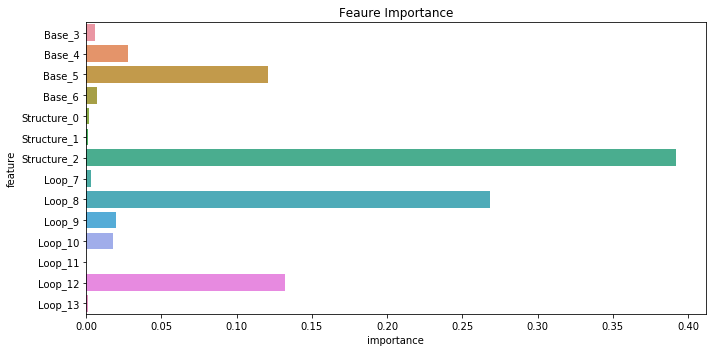

In [20]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
importances = pd.DataFrame({'feature':input_cols,'importance':np.round(model.feature_importances_,3)})

plt.figure(figsize=(10, 5))
sns.barplot(x=importances['importance'], y=importances['feature'])
plt.title('Feaure Importance')
plt.tight_layout()
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

It can be seen that first four features amount to almost 90% of information. Base unpaired information (structure 2), loop 8(E), loop 12(S), loop 9(H), loop 10(I) and bases can provide almost the full information. Structure 0 and structure 1 contribution is less because this information is there in loop12. But eventhough structure 2 and loop 12 have a -1 correlation, that is not depicted here. This is here the forest is unable to decode this link, Lets probe further to see if we can use that information as well.

## Feature:Unpaired Probability

Lets repeat the above analysis with unpaired probability.

In [21]:
input_cols = ['unpaired_probability','Base_3','Base_4','Base_5','Base_6','Structure_0','Structure_1','Structure_2','Loop_7','Loop_8','Loop_9','Loop_10','Loop_11','Loop_12','Loop_13']
X_train = X_train_full[input_cols]

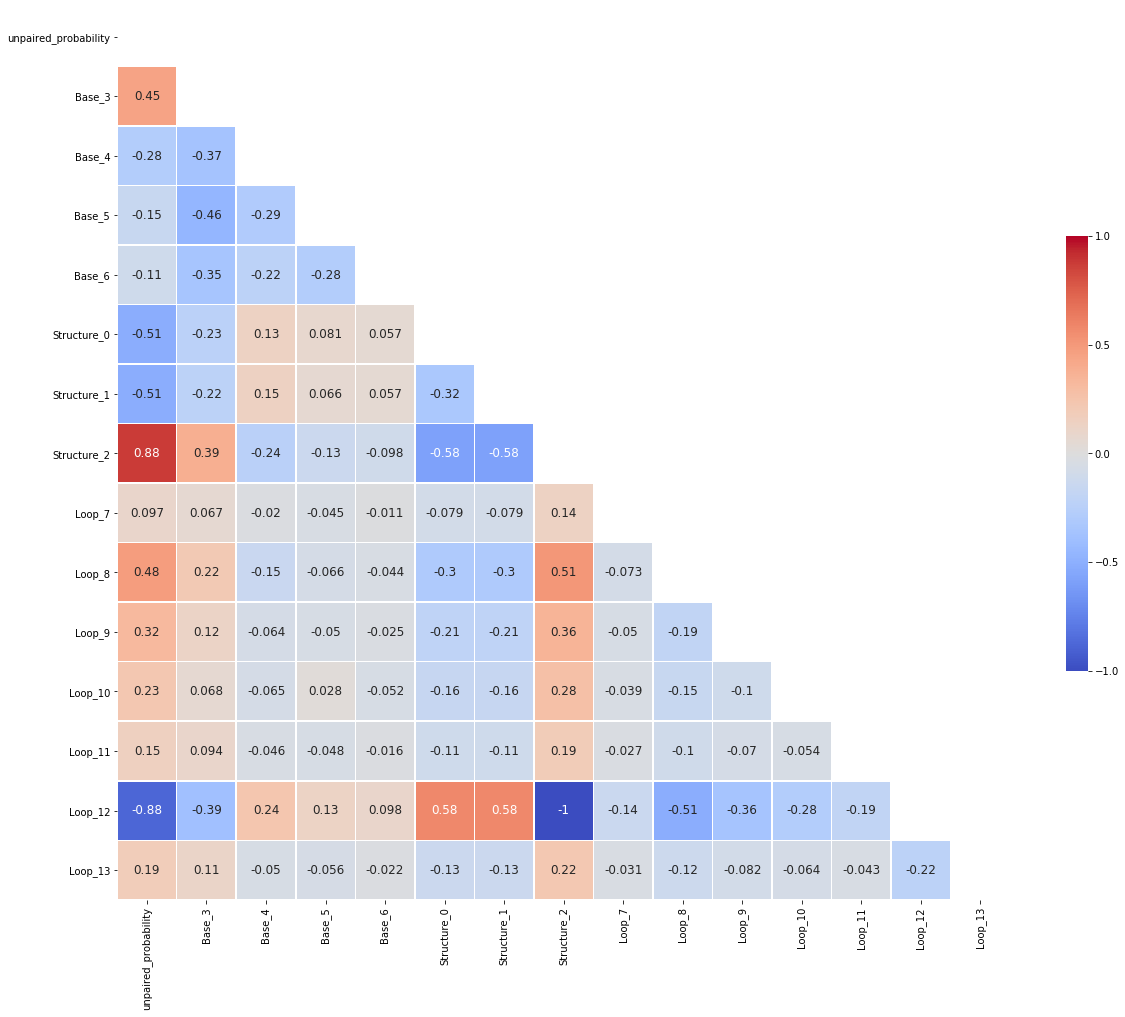

In [22]:
corr_matrix = X_train.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

It can be noted that there is high negative correlation between unpaired probability and loop 12, structure information. This is also intuitive as paired bases will have near to zero unpaired probability and unpaired bases will have near to one unpaired probability. So it seems that this single feature can encode the information in these 4 fields. Lets check it out.

,importance
feature,
unpaired_probability,0.843
Loop_8,0.072
Base_5,0.032
Base_3,0.014
Base_4,0.011
Structure_0,0.005
Structure_1,0.005
Loop_9,0.005
Base_6,0.004


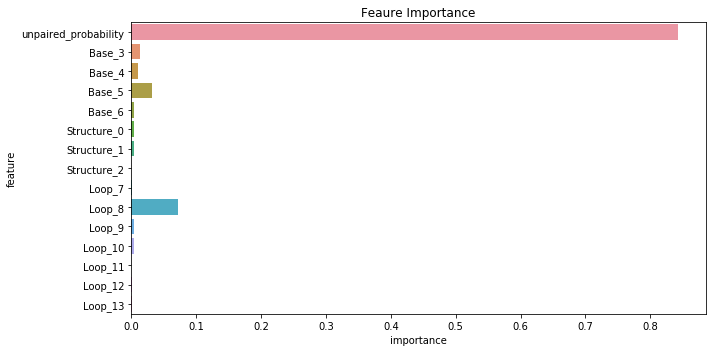

In [23]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
importances = pd.DataFrame({'feature':input_cols,'importance':np.round(model.feature_importances_,3)})

plt.figure(figsize=(10, 5))
sns.barplot(x=importances['importance'], y=importances['feature'])
plt.title('Feaure Importance')
plt.tight_layout()
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

It can be seen that unpaired probability, base type and loop 8 ('E') have major contribution to output. And as hypothesised, the contributions of structure and loop 12 have gone down which is a good indication. It can be also noted that unpaired probability contributes about 85% of all the information,

### Make dummy submission File

This will be overwritten if everything works fine.

In [24]:
submission = pd.read_csv('../input/stanford-covid-vaccine/sample_submission.csv', index_col= 0)
submission.to_csv('submission.csv')
submission.T

FileNotFoundError: [Errno 2] File b'../input/stanford-covid-vaccine/sample_submission.csv' does not exist: b'../input/stanford-covid-vaccine/sample_submission.csv'

You have to make 107 / 130 predictions per input for the 5 parameters (only 3 of these are used for scoring).

## Develop Your model

Seems you will need something like an LSTM that works on sequence data.

In [ ]:
# Dummy

## Train your model

In [ ]:
# Dummy

## Perform your prediction

In [ ]:
# Dummy

## Filling dummy values

Lets use values mean and std from train data as a dummy submission

In [ ]:
y_train.describe()

In [ ]:
n = submission.shape[0]
reactivity_bar = 0.374922; reactivity_sd = 0.725652
deg_Mg_pH10_bar = 0.446303; deg_Mg_pH10_sd = 0.704172
deg_pH10_bar = 0.446911; deg_pH10_sd = 1.285747
deg_Mg_50C_bar = 0.407030; deg_Mg_50C_sd = 0.868013
deg_50C_bar = 0.425889; deg_50C_sd = 1.122356
submission['reactivity']=np.random.normal(reactivity_bar, reactivity_sd, size=n)
submission['deg_Mg_pH10']=np.random.normal(deg_Mg_pH10_bar, deg_Mg_pH10_sd, size=n)
submission['deg_pH10']=np.random.normal(deg_pH10_bar, deg_pH10_sd, size=n)
submission['deg_Mg_50C']=np.random.normal(deg_Mg_50C_bar, deg_Mg_50C_sd, size=n)
submission['deg_50C']=np.random.normal(deg_50C_bar, deg_50C_sd, size=n)
submission

## Submit

In [ ]:
submission.to_csv('submission.csv')

# EOF